#**SOTA model architectures of fast.ai**

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.7MB/s 
     |████████████████████████████████| 194kB 18.2MB/s 
     |████████████████████████████████| 1.2MB 27.7MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

#Image Classification

In [11]:
def is_dog(x):
  return x[0].islower()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42, 
    label_func=is_dog, item_tfms=Resize(224)
)

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.138352,0.041619,0.010149,00:50


epoch,train_loss,valid_loss,error_rate,time
0,0.043995,0.025102,0.006766,00:56


In the above cell output, we can see that the error rate is on an average about 0.0067. In the below cells, we will pass in some images to see how the model performs. 

In [14]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

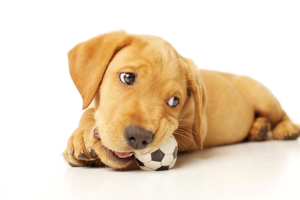

Is this a dog?: True.
Probability it's a dog: 0.999998


In [28]:
dog_img = PILImage.create(uploader.data[0])
size = (300, 200)
temp_img = dog_img.resize(size)
display(temp_img)

is_dog,_,probs = learn.predict(dog_img)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}") 

In [29]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

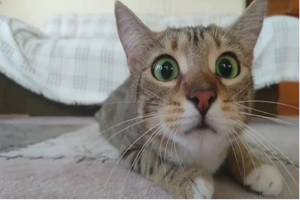

Is this a dog?: False.
Probability it's a dog: 0.000000


In [30]:
cat_img = PILImage.create(uploader.data[0])
size = (300, 200)
temp_img = cat_img.resize(size)
display(temp_img)

is_dog,_,probs = learn.predict(cat_img)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

#Segmentation model

In [34]:
path = untar_data(URLs.CAMVID_TINY)

dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.993089,2.387604,00:01


epoch,train_loss,valid_loss,time
0,2.063829,1.758687,00:01
1,1.716957,1.281921,00:01
2,1.518250,1.295711,00:01
3,1.372725,1.012447,00:01
4,1.227115,0.888707,00:01
5,1.105084,0.839683,00:01
6,1.004875,0.813995,00:01
7,0.926371,0.803728,00:01


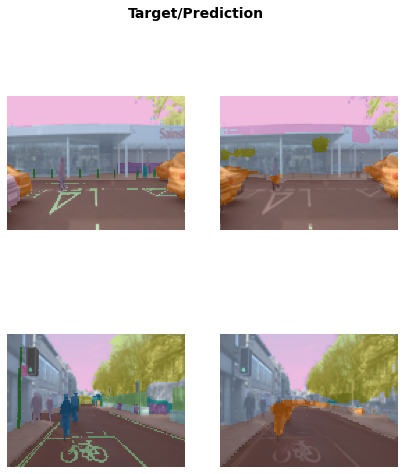

In [35]:
learn.show_results(max_n=6, figsize=(7,8))

#Text Classification using IMBD data

In [36]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.475423,0.411138,0.819280,03:57


epoch,train_loss,valid_loss,accuracy,time
0,0.312983,0.245679,0.903680,07:37
1,0.251807,0.201278,0.921000,07:39
2,0.188682,0.192769,0.926480,07:40
3,0.138474,0.185986,0.930320,07:39


In [39]:
learn.predict("That movie was awful!")

('neg', tensor(0), tensor([9.9951e-01, 4.9257e-04]))

In [38]:
learn.predict("That was a delightful movie")

('pos', tensor(1), tensor([0.0029, 0.9971]))

#Tabular Data

In [41]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path = path, y_names = "salary",
                                  cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                                               'relationship', 'race'],
                                  cont_names = ['age', 'fnlwgt', 'education-num'],
                                  procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [42]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.371675,0.362530,0.832310,00:04
1,0.350732,0.353551,0.838759,00:05
2,0.345243,0.350968,0.838759,00:05


#Recommendation Systems using MovieLens Dataset

In [43]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5, 0.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,11.878312,11.854270,00:00


epoch,train_loss,valid_loss,time
0,11.907757,11.854270,00:00
1,11.900603,11.854270,00:00
2,11.814336,11.854270,00:00
3,11.859930,11.854270,00:00
4,11.889062,11.854270,00:00
5,11.867468,11.854270,00:00
6,11.821814,11.854270,00:00
7,11.860598,11.854270,00:00
8,11.905278,11.854270,00:00
9,11.816459,11.854270,00:00


In [44]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,8.0,80.0,4.0,0.5
1,100.0,72.0,3.0,0.5
2,53.0,60.0,5.0,0.5
3,13.0,53.0,5.0,0.5
4,7.0,81.0,5.0,0.5
5,56.0,95.0,4.0,0.5
6,93.0,77.0,5.0,0.5
7,46.0,80.0,3.5,0.5
8,90.0,77.0,4.0,0.5
